In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix

In [2]:
sms_data = pd.read_csv('/content/spam.csv', encoding='latin-1')
sms_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
sms_data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
sms_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
sms_data.rename(columns={'v1':'category','v2':'text'},inplace=True)
sms_data.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
sms_data.isnull().sum()

,0
category,0
text,0


In [7]:
sms_data.loc[sms_data['category'] == 'spam', 'category',] = 1
sms_data.loc[sms_data['category'] == 'ham', 'category',] = 0

In [8]:
sms_data.head()

,category,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
sms_data.duplicated().sum()

403

In [10]:
sms_data.drop_duplicates(keep='first',inplace=True)
sms_data.shape

(5169, 2)

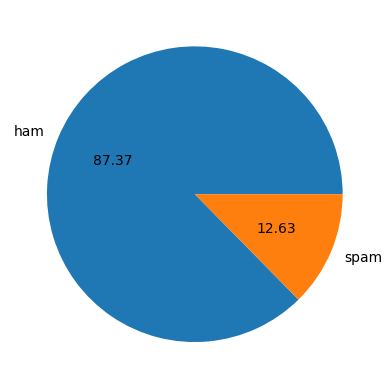

In [11]:
plt.pie(sms_data['category'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [12]:
sms_data[sms_data['category'] == 0]['text'].apply(len).describe()

,text
count,4516.000000
mean,70.459256
std,56.358207
min,2.000000
25%,34.000000
50%,52.000000
75%,90.000000
max,910.000000


In [13]:
sms_data[sms_data['category'] == 1]['text'].apply(len).describe()

,text
count,653.000000
mean,137.891271
std,30.137753
min,13.000000
25%,132.000000
50%,149.000000
75%,157.000000
max,224.000000


In [14]:
sms_data['char_num']=sms_data['text'].apply(len)
sms_data.head()

,category,text,char_num
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
def text_preprocess(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    ps=PorterStemmer()
    text = [ps.stem(word) for word in text]
    return " ".join(text)

In [17]:
sms_data['transformed_text'] = sms_data['text'].apply(text_preprocess)

In [18]:
sms_data.head()

,category,text,char_num,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [19]:
X = sms_data['transformed_text']
Y = sms_data['category'].astype(int)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [24]:
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [25]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(5169,) (4135, 3000) (1034, 3000)
(5169,) (4135,) (1034,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
svc = SVC(class_weight='balanced')
knc = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB(class_prior=[0.8, 0.2])
bnb = BernoulliNB(class_prior=[0.8, 0.2])
dtc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
lrc = LogisticRegression(class_weight='balanced')
rfc = RandomForestClassifier(class_weight='balanced', random_state=42)

In [28]:
algo=[svc,knc,gnb,mnb,bnb,dtc,lrc,rfc]
algo_name=['SVC','KNeighborsClassifier','GaussianNB','MultinomialNB','BernoulliNB','DecisionTreeClassifier','LogisticRegression','RandomForestClassifier']

In [29]:
for i in range(len(algo)):
  algo[i].fit(X_train,Y_train)
  training_data_prediction = algo[i].predict(X_train)
  accuracy = accuracy_score(Y_train, training_data_prediction)
  precision = precision_score(Y_train, training_data_prediction)
  print(algo_name[i], '\n')
  print('Train_Accuracy: ', accuracy, '\n')
  print('Train_Precision: ', precision, '\n')
  print('CM_train: ',confusion_matrix(Y_train,training_data_prediction), '\n')
  testing_data_prediction = algo[i].predict(X_test)
  accuracy = accuracy_score(Y_test, testing_data_prediction)
  precision = precision_score(Y_test, testing_data_prediction)
  print('Test_Accuracy: ', accuracy, '\n')
  print('Test_Precision: ', precision, '\n')
  print('CM_test: ',confusion_matrix(Y_test,testing_data_prediction), '\n')

SVC 

Train_Accuracy:  0.9985489721886336 

Train_Precision:  0.9940944881889764 

CM_train:  [[3624    3]
 [   3  505]] 

Test_Accuracy:  0.9787234042553191 

Test_Precision:  0.9624060150375939 

CM_test:  [[884   5]
 [ 17 128]] 

KNeighborsClassifier 

Train_Accuracy:  0.9235792019347038 

Train_Precision:  1.0 

CM_train:  [[3627    0]
 [ 316  192]] 

Test_Accuracy:  0.90715667311412 

Test_Precision:  1.0 

CM_test:  [[889   0]
 [ 96  49]] 

GaussianNB 

Train_Accuracy:  0.8952841596130593 

Train_Precision:  0.5398512221041445 

CM_train:  [[3194  433]
 [   0  508]] 

Test_Accuracy:  0.8365570599613152 

Test_Precision:  0.4552238805970149 

CM_test:  [[743 146]
 [ 23 122]] 

MultinomialNB 

Train_Accuracy:  0.9854897218863361 

Train_Precision:  0.9933920704845814 

CM_train:  [[3624    3]
 [  57  451]] 

Test_Accuracy:  0.9738878143133463 

Test_Precision:  0.9682539682539683 

CM_test:  [[885   4]
 [ 23 122]] 

BernoulliNB 

Train_Accuracy:  0.98863361547763 

Train_Precision:

In [30]:
texts = [
    "Congratulations! You've won a $1000 gift card. Claim your prize now!",
    "Urgent! Your account has been compromised. Click here to secure it now!",
    "Limited time offer: Get 50% off on your first purchase. Hurry up!",
    "Dear user, we noticed suspicious activity on your account. Please confirm your details.",
    "You’ve been selected for an exclusive promotion! Just reply with your credit card number.",
    "Call now to get your free vacation voucher! No purchase necessary.",
    "Your subscription has been renewed. If you did not authorize this, call us immediately.",
    "Free money, no strings attached! Just send us your email and we’ll send you cash.",
    "Buy cheap medications now! No prescription required!",
    "Click here for a surprise bonus! Limited slots available.",
    "Hey! This is your last chance to claim your free iPhone, click here to get it.",
    "Don't miss out! Last 24 hours to claim your exclusive prize.",
    "Make thousands of dollars in your spare time! No skills required, start today.",
    "Your friend sent you a message. Click here to see it!",
    "Earn $5000 a week with this simple investment. Act fast!",
    "Hi, I hope you're doing well. Let me know if you're available for lunch this week!",
    "Can you send me the report for the meeting tomorrow?",
    "Thanks for your email. I'll get back to you as soon as I can.",
    "Just wanted to check in and see if you're free for a call later today.",
    "I’m heading to the store. Do you need anything?",
    "Hey, I saw your post on social media. How’s everything going?",
    "Looking forward to seeing you at the event next week.",
    "It was great catching up with you last weekend. Let's plan something again soon!",
    "Just finished reading the book you recommended. It was fantastic!",
    "I received the package you sent. Thanks for the thoughtful gift!",
    "Happy birthday! Hope you have a wonderful day!",
    "I’ve scheduled the meeting for 10 AM tomorrow. Let me know if that works for you.",
    "Do you know if the meeting is still on for this afternoon?",
    "I’m planning a trip next month. Do you have any recommendations for things to do?",
    "Thanks for helping me with the project. I really appreciate it!"
]

df = pd.DataFrame(texts, columns=['Text'])

In [32]:
df['Text'] = df['Text'].apply(text_preprocess)
word=tfidf.transform(df['Text']).toarray()

In [36]:
predict=mnb.predict(word)
for i in range(len(predict)):
  if predict[i]==1:
    print('Spam ')
  else:
    print('Ham ')

Spam 
Spam 
Ham 
Ham 
Spam 
Spam 
Spam 
Ham 
Ham 
Spam 
Spam 
Spam 
Ham 
Ham 
Ham 
Ham 
Ham 
Ham 
Ham 
Ham 
Ham 
Ham 
Ham 
Ham 
Ham 
Ham 
Ham 
Ham 
Ham 
Ham 
